# 改变世界的傅立叶变换

> 图像处理一般分为空间域处理和频率域处理。
> 
> 空间域处理是直接对图像内的像素进行处理。空间域处理主要划分为灰度变换和空间滤波两种形式。灰度变换是对图像内的单个像素进行处理，比如调节对比度和处理阈值等。空间滤波涉及图像质量的改变，例如图像平滑处理。空间域处理的计算简单方便，运算速度更快。
> 
> 频率域处理是先将图像变换到频率域，然后在频率域对图像进行处理，最后再通过反变换将图像从频率域变换到空间域。傅里叶变换是应用最广泛的一种频域变换，它能够将图像从空间域变换到频率域，而逆傅里叶变换能够将频率域信息变换到空间域内。傅里叶变换在图像处理领域内有着非常重要的作用。
>
> 经过傅里叶变换后，得到的频域值是复数。因此，显示傅里叶变换的结果需要使用实数图像（realimage）加虚数图像（complex image），或者幅度图像（magnitude image）加相位图像（phase image）的形式。
> 
> 因为幅度图像包含了原图像中我们所需要的大部分信息，所以在图像处理过程中，通常仅使用幅度图像。当然，如果希望先在频域内对图像进行处理，再通过逆傅里叶变换得到修改后的空域图像，就必须同时保留幅度图像和相位图像。
> 
> 对图像进行傅里叶变换后，我们会得到图像中的低频和高频信息。低频信息对应图像内变化缓慢的灰度分量。高频信息对应图像内变化越来越快的灰度分量，是由灰度的尖锐过渡造成的。例如，在一幅大草原的图像中有一头狮子，低频信息就对应着广袤的颜色趋于一致的草原等细节信息，而高频信息则对应着狮子的轮廓等各种边缘及噪声信息。
> 
> 傅里叶变换的目的，就是为了将图像从空域转换到频域，并在频域内实现对图像内特定对象的处理，然后再对经过处理的频域图像进行逆傅里叶变换得到空域图像。傅里叶变换在图像处理领域发挥着非常关键的作用，可以实现图像增强、图像去噪、边缘检测、特征提取、图像压缩和加密等。

## 参考文献帮助理解
* [通俗讲解：图像傅里叶变换-麻花团子](https://zhuanlan.zhihu.com/p/99605178)
* [图像处理（5）--图像的傅里叶变换](https://blog.csdn.net/qq_33208851/article/details/94834614)

> 图像的频率是表征图像中灰度变化剧烈程度的指标，是灰度在平面空间上的梯度。（灰度变化得快频率就高，灰度变化得慢频率就低）。
>
> 图像上某一点与邻域点灰度值差异的强弱，即梯度的大小，也即该点的频率的大小（差异/梯度越大，频率越高，能量越低，在频谱图上就越 暗。差异/梯度越小，频率越低，能量越高，在频谱图上就越 亮。换句话说，频率谱上越亮能量越高，频率越低，图像差异越小/平缓）。一般来讲，梯度大则该点的亮度强，否则该点亮度弱。频谱图，也叫功率图。

# numpy实现傅立叶变换

语法：`返回值 = numpy.fft.fft2(原始图像)`

fft 应该是 快速傅立叶变换的缩写。

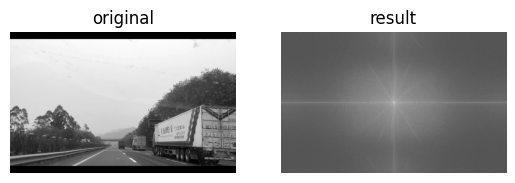

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('images/highway.jpg',0)
f = np.fft.fft2(img)

# 经过该函数的处理，就能得到图像的频谱信息。此时，图像频谱中的零频率分量位于频谱图像（频域图像）[插图]的左上角，为了便于观察，通常会使用numpy.fft.fftshift()函数将零频率成分移动到频域图像的中心位置
fshift = np.fft.fftshift(f)
# 对图像进行傅里叶变换后，得到的是一个复数数组。为了显示为图像，需要将它们的值调整到[0, 255]的灰度空间内
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('original')
plt.axis('off')
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('result')
plt.axis('off')
plt.show()

## 逆傅立叶变换

如果在傅里叶变换过程中使用了numpy.fft.fftshift()函数移动零频率分量，那么在逆傅里叶变换过程中，需要先使用numpy.fft.ifftshift()函数将零频率分量移到原来的位置，再进行逆傅里叶变换。

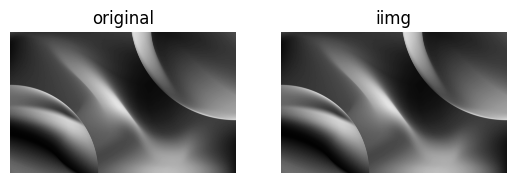

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('images/color.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

ishift = np.fft.ifftshift(fshift)
iimg = np.fft.ifft2(ishift)
#print(iimg)
iimg = np.abs(iimg)
#print(iimg)
plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('original'), plt.axis('off')
plt.subplot(122), plt.imshow(iimg, cmap = 'gray')
plt.title('iimg'), plt.axis('off')
plt.show()

## 高通滤波

在一幅图像内，同时存在着高频信号和低频信号。

● 低频信号对应图像内变化缓慢的灰度分量。例如，在一幅大草原的图像中，低频信号对应着颜色趋于一致的广袤草原。

● 高频信号对应图像内变化越来越快的灰度分量，是由灰度的尖锐过渡造成的。如果在上面的大草原图像中还有一头狮子，那么高频信号就对应着狮子的边缘等信息。

滤波器能够允许一定频率的分量通过或者拒绝其通过，按照其作用方式可以划分为低通滤波器和高通滤波器。

● 允许低频信号通过的滤波器称为低通滤波器。低通滤波器使高频信号衰减而对低频信号放行，会使图像变模糊。

● 允许高频信号通过的滤波器称为高通滤波器。高通滤波器使低频信号衰减而让高频信号通过，将增强图像中尖锐的细节，但是会导致图像的对比度降低。

傅里叶变换可以将图像的高频信号和低频信号分离。

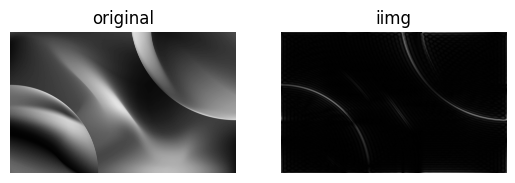

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('images/color.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

ishift = np.fft.ifftshift(fshift)
iimg = np.fft.ifft2(ishift)
iimg = np.abs(iimg)
plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('original'), plt.axis('off')
plt.subplot(122), plt.imshow(iimg, cmap = 'gray')
plt.title('iimg'), plt.axis('off')
plt.show()

# OpenCV实现傅里叶变换

OpenCV提供了函数cv2.dft()和cv2.idft()来实现傅里叶变换和逆傅里叶变换。

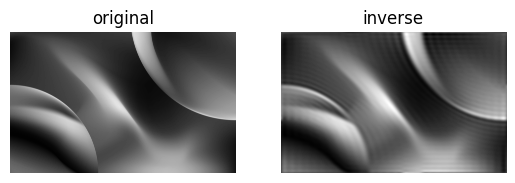

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('images/color.jpg',0)
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
dftShift = np.fft.fftshift(dft)
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)
mask = np.zeros((rows, cols,2), np.uint8)
#两个通道，与频域图像匹配
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
fShift = dftShift*mask
ishift = np.fft.ifftshift(fShift)
iImg = cv2.idft(ishift)
iImg= cv2.magnitude(iImg[:, :,0], iImg[:, :,1])
plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('original'), plt.axis('off')
plt.subplot(122), plt.imshow(iImg, cmap = 'gray')
plt.title('inverse'), plt.axis('off')
plt.show()